In [1]:

from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#import keras.preprocessing
#from keras.utils import load_img

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense, BatchNormalization
from keras import backend as K
import os
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train = "/content/drive/MyDrive/Colab Notebooks/train"
test = "/content/drive/MyDrive/Colab Notebooks/test"
val = "/content/drive/MyDrive/Colab Notebooks/val"

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, rotation_range = 30,
                                   width_shift_range=0.1, height_shift_range=0.1, horizontal_flip = True, vertical_flip=False)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
train_gen = train_datagen.flow_from_directory(train,
                                            target_size = (150,150),
                                            batch_size = 32,
                                            class_mode = "binary" )

Found 5216 images belonging to 2 classes.


In [8]:
test_gen = train_datagen.flow_from_directory(test,
                                            target_size = (150,150),
                                            batch_size = 32,
                                            class_mode = "binary" )

Found 858 images belonging to 2 classes.


In [9]:
val_gen = train_datagen.flow_from_directory(val,
                                            target_size = (150,150),
                                            batch_size = 32,
                                            class_mode = "binary" )

Found 16 images belonging to 2 classes.


In [10]:
model = Sequential()
# The number of filters are 32 and the kernal_size is (3,3)
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["acc"])

In [12]:
history = model.fit(train_gen,
                         steps_per_epoch = 163,
                         epochs = 20,
                         validation_data = val_gen,
                         validation_steps = 1)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 1150s 7s/step - acc: 0.7528 - loss: 0.5781 - val_acc: 0.6250 - val_loss: 0.8521
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 117us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


163/163 ━━━━━━━━━━━━━━━━━━━━ 106s 535ms/step - acc: 0.8699 - loss: 0.3074 - val_acc: 0.6875 - val_loss: 0.5841
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 69us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 91s 535ms/step - acc: 0.8759 - loss: 0.2891 - val_acc: 0.6875 - val_loss: 0.9083
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 74us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 91s 529ms/step - acc: 0.9008 - loss: 0.2409 - val_acc: 0.6250 - val_loss: 1.3670
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 528ms/step - acc: 0.9200 - loss: 0.1974 - val_acc: 0.6250 - val_loss: 1.3658
Epoch 10/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 90s 532ms/step - acc: 0.9230 - loss: 0.1905 - val_acc: 0.6250 - val_loss: 0.9629
Epoch 12/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0

In [15]:
model.save("pneumonia.h5")

In [16]:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)

In [17]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2

In [18]:
model = load_model("pneumonia.h5")

In [19]:
from skimage.transform import resize

In [20]:
def detect(frame):
    try:
        img = resize(frame, (150,150))
        img = np.expand_dims(img, axis=0)
        prediction = model.predict(img)
        print(prediction)
        prediction = prediction > 0.5
        print(prediction)
        s = "PNEUMONIA" if (prediction[0][0]) else "NORMAL"
        return (s)
    except AttributeError:
        print("SHAPE NOT FOUND")

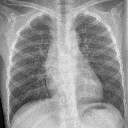

In [21]:
image.load_img("/content/drive/MyDrive/Colab Notebooks/test/NORMAL/Copy of IM-0006-0001.jpeg",target_size = (128,128))

In [23]:
frame = cv2.imread("/content/drive/MyDrive/Colab Notebooks/test/NORMAL/Copy of IM-0006-0001.jpeg")
data = detect(frame)
data

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step
[[0.3763899]]
[[False]]


'NORMAL'

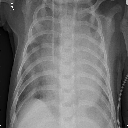

In [24]:
image.load_img("/content/drive/MyDrive/Colab Notebooks/test/PNEUMONIA/person100_bacteria_480.jpeg",target_size = (128,128))

In [26]:
frame = cv2.imread("/content/drive/MyDrive/Colab Notebooks/test/PNEUMONIA/person100_bacteria_480.jpeg")
data = detect(frame)
data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.9992423]]
[[ True]]


'PNEUMONIA'

In [ ]:
#downloading saved model
!zip -r '/content/drive/MyDrive/project.zip' '/content/drive/MyDrive'

Streaming output truncated to the last 5000 lines.
updating: content/drive/MyDrive/train/NORMAL/IM-0732-0001.jpeg (deflated 1%)
updating: content/drive/MyDrive/train/NORMAL/IM-0736-0001.jpeg (deflated 1%)
updating: content/drive/MyDrive/train/NORMAL/IM-0714-0001.jpeg (deflated 1%)
updating: content/drive/MyDrive/train/NORMAL/IM-0706-0001.jpeg (deflated 1%)
updating: content/drive/MyDrive/train/NORMAL/IM-0748-0001.jpeg (deflated 0%)
updating: content/drive/MyDrive/train/NORMAL/IM-0668-0001.jpeg (deflated 1%)
updating: content/drive/MyDrive/train/NORMAL/IM-0691-0001.jpeg (deflated 1%)
updating: content/drive/MyDrive/train/NORMAL/IM-0678-0001.jpeg (deflated 0%)
updating: content/drive/MyDrive/train/NORMAL/IM-0717-0001.jpeg (deflated 1%)
updating: content/drive/MyDrive/train/NORMAL/IM-0741-0001.jpeg (deflated 1%)
updating: content/drive/MyDrive/train/NORMAL/IM-0755-0001.jpeg (deflated 0%)
updating: content/drive/MyDrive/train/NORMAL/IM-0676-0001.jpeg (deflated 1%)
updating: content/drive/M